# 계획 세우기

모델을 변경하고, 모델을 조합해서 성능 올리는 방법에 대해서 배웠다.

이번에는 전처리를 통해서 모델 성능을 올려볼 차례이다.

- 중요도가 낮은 단어들까지 포함해서 많은 단어를 사용하면 성능이 저하될 수도 있고
- 반대로 너무 적은 단어들을 사용해도 성능이 저하될 수 있다.
- 이러한 단어 수는 모델의 종류에 따라 달라질 수도 있다.

이를 실험적으로 vocabulary size를 변경해서 시도해보자!

In [1]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 16.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 7.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 4.7 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 15.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 45.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22/22 [tensorflow]2 [tensorflow]]]ata-server]


In [2]:
import os
import tensorflow
from tensorflow.keras.datasets import reuters
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn

print(tensorflow.__version__)
print(matplotlib.__version__)
print(sns.__version__)
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)

2025-09-02 09:03:10.267720: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-02 09:03:10.436201: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-02 09:03:13.370800: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


2.20.0
3.10.3
0.13.2
2.2.6
2.3.0
1.7.0


# 데이터 EDA

- 로이터 뉴스 데이터
- 클래스 46개
- 해당 뉴스가 어느 카테고리에 속하는 지 예측하기 위한 데이터

In [3]:
# 데이터 다운로드
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [4]:
print(x_train[0])
print(x_test[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [5]:
# 클래스 수 확인
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


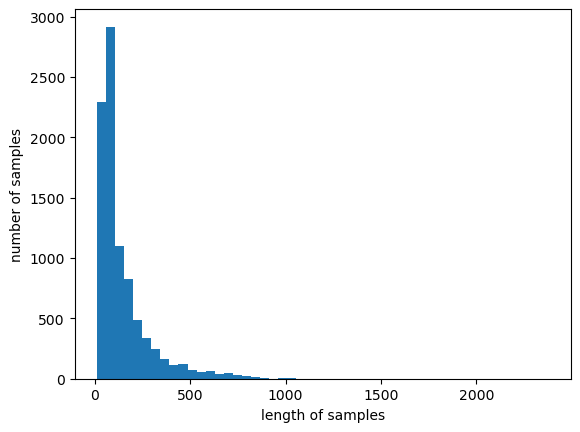

In [6]:
# 최대 길이 확인
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

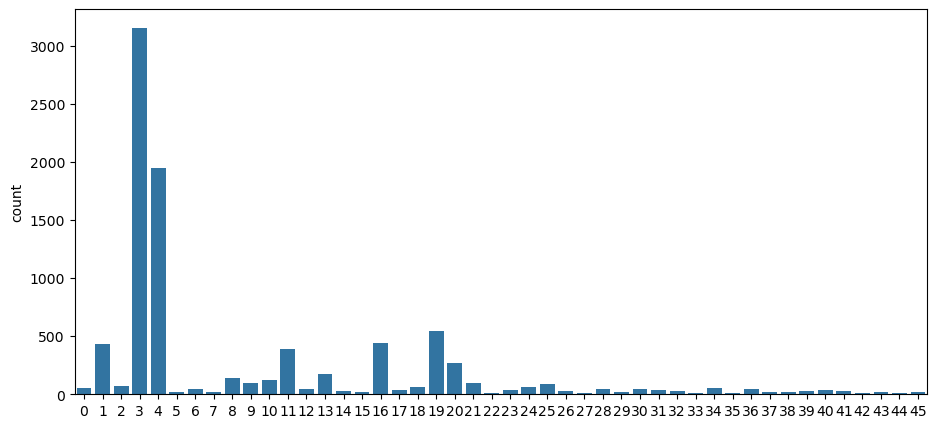

In [7]:
# 클래스 별 분포 시각화

fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [8]:
# 클래스 별 빈도수
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


## 인사이트

- num_wordd란, 데이터에서 빈도수 기준으로 상위 몇 번째 단어까지 사용할 것인지를 조절한다.
- 설정된 num_words가 넘는 단어들은 자동으로 <unk>처리 된다.
- train 8,982개 test 2,246개
- 가장 길이가 긴 뉴스는 2,376, 평균은 145
- 가장 분포가 많은 클래스는 3번과 4번
- 토큰 0,1,2는 <pad>, <sos>, <unk>에 매핑되어 있다.

# 데이터 텍스트로 변환하기

In [9]:
# word_index 다운로드
# word_index = reuters.get_word_index(path="reuters_word_index.json")
!wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/reuters_word_index.json

import json

# 1. 파일 열기
with open('reuters_word_index.json', 'r', encoding='utf-8') as f:
    # 2. JSON 로드
    word_index = json.load(f)

print('=3')

--2025-09-02 09:03:20--  https://storage.googleapis.com/tensorflow/tf-keras-datasets/reuters_word_index.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.207, 142.251.170.207, 173.194.174.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 550378 (537K) [application/json]
Saving to: ‘reuters_word_index.json.2’

reuters_word_index. 100%[===================>] 537.48K   896KB/s    in 0.6s    

2025-09-02 09:03:21 (896 KB/s) - ‘reuters_word_index.json.2’ saved [550378/550378]

=3


In [10]:
# 특수 토큰 고려해서, 인덱스에 3을 더해줘야 한다. 
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

=3


In [11]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어준다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

=3


In [12]:
# 잘 디코딩되는 지 확인해보자
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [13]:
# index를 다시 디코딩 index -> word
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [14]:
#test데이터도 변환을 잊지말자.

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [15]:
# 잘 되는 지 확인
x_train[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for o

# 데이터 벡터화하기

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


In [17]:
# DTM 생성하기

dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


In [18]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


# 실험 전 Confusion Matrix 준비

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('=3')

=3


In [20]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

print('=3')

=3


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

def get_tfidf(x_train, x_test):
    dtmvector = CountVectorizer()
    x_train_dtm = dtmvector.fit_transform(x_train)
    x_test_dtm = dtmvector.transform(x_test)

    tfidf_transformer = TfidfTransformer()
    tfidfv_train = tfidf_transformer.fit_transform(x_train_dtm)
    tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

    return tfidfv_train, tfidfv_test


tfidfv_train, tfidfv_test = get_tfidf(x_train, x_test)
print(tfidfv_train.shape, tfidfv_test.shape)

(8982, 9670) (2246, 9670)


In [22]:
from keras.datasets import reuters

# 단어 사전 불러오기
word_index = reuters.get_word_index()
index_word = {v + 3: k for k, v in word_index.items()}
index_word[0] = "<pad>"; index_word[1] = "<sos>"; index_word[2] = "<unk>"

def seq_to_text(seq):
    return " ".join(index_word.get(i, "<unk>") for i in seq)


550378/550378 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [23]:
(x_train_idx, y_train), (x_test_idx, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

# 인덱스 리스트 → 문자열 리스트
x_train = [seq_to_text(seq) for seq in x_train_idx]
x_test  = [seq_to_text(seq) for seq in x_test_idx]

# 이제 TF-IDF 만들기
tfidfv_train, tfidfv_test = get_tfidf(x_train, x_test)
print(tfidfv_train.shape, tfidfv_test.shape)


(8982, 9670) (2246, 9670)


# 실험 계획

1. 사용할 단어 수
   - 빈도 수 상위 2,000
   - 빈도 수 상위 5,000
   - 빈도 수 상위 10,000
   - 빈도 수 상위 20,000

2. 사용할 모델
    - 서포트 벡터 머신
    - 랜덤 포레스트
    - 그래디언트 부스팅 트리
    - 보팅

이렇게 선정한 이유:

- SVM은 회귀 중에 하나를 택하려 했으나, 로지스틱은 이전에 다뤄봤으므로 SVM 선택함
- 랜덤 포레스트를 수행 후 그래디언트 부스팅 트리와 비교하기 때문에 2개를 동시에 선택함
- 보팅이 노드 예제에서 가장 성능이 좋았기 때문에 선택함


In [24]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression


from sklearn.base import clone
from sklearn.metrics import accuracy_score, f1_score

In [25]:
models = {
    "LinSVC" : LinearSVC(C=1, penalty='l1', max_iter=5000, dual=False),
    "RandFor": RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42),
    "grbt": GradientBoostingClassifier(random_state=42),
    "Voting": VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(C=4.0, solver='liblinear', max_iter=500, random_state=42)),
            ('cb', ComplementNB()),
            ('grbt', GradientBoostingClassifier(random_state=42)),
        ],
        voting='soft'
    ),
}

In [ ]:
for model_name, model_template in models.items():
    print() # 줄바꿈
    vocab_size_list = [2000, 5000, 10000, 20000]
    
    for vocab_size in vocab_size_list:
        # 1. Reuters 데이터 로드 (인덱스 시퀀스)
        (x_train_idx, y_train), (x_test_idx, y_test) = reuters.load_data(num_words=vocab_size, test_split=0.2)

        # 2. 인덱스 → 문자열 변환
        x_train = [seq_to_text(seq) for seq in x_train_idx]
        x_test  = [seq_to_text(seq) for seq in x_test_idx]

        # 3. TF-IDF 변환
        Xtr, Xte = get_tfidf(x_train, x_test)

        # 4. 모델 복제 후 학습
        clf = clone(model_template)
        
        # sparse를 못 받는 모델은 dense로 변환
        needs_dense = model_name.lower() in {"randfor", "grbt", "lgbm_dense"}
        if needs_dense:
            Xtr_fit = Xtr.toarray()
            Xte_eval = Xte.toarray()
        else:
            Xtr_fit = Xtr
            Xte_eval = Xte

        clf.fit(Xtr_fit, y_train)
        y_pred = clf.predict(Xte_eval)

        acc = accuracy_score(y_test, y_pred)
        f1  = f1_score(y_test, y_pred, average="macro", zero_division=0)
        
        print(f"[Vocab size {vocab_size} | {model_name}] Accurary: {acc:.4f}, F1 score: {f1:.4f}")

In [ ]:
# Accuracy 상위 2개만 그림
sorted_results = sorted(results, key=lambda x: x[2], reverse=True)

for model_name, vocab_size, acc, f1, clf, Xte_eval, y_test in sorted_results[:2]:
    graph_confusion_matrix(clf, Xte_eval, y_test,
                           title=f"{model_name} (vocab={vocab_size})")